<a href="https://colab.research.google.com/github/SowmyaMadala/dreamdig/blob/master/zsprize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mental Health Analysis and Prediction in Tech Industry**

### importing required packages and the dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/content/OSMI 2019 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv')
#data.columns

Analyzing the Dataset

In [ ]:
data.head()

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",...,Describe the conversation you had with your previous coworker

In [ ]:
data.shape

(352, 82)

In [ ]:
#data.describe

In [ ]:
data.isnull()

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",...,Describe the conversation you had with your previous coworker

In [ ]:
#df.describe()
df=data.copy()

In [ ]:
df.describe(include=['O'])

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with your coworkers at previous employers?,Did you ever discuss your mental health with a previous coworker(s)?,Describe the conversation you had with your previous coworkers about your mental health including their 

In [ ]:
df1=df.copy()
half_count = len(df1) / 2
#removing the coumns with more than half of the null values
df1 = df1.dropna(thresh=half_count,axis=1)
df1.shape

(352, 59)

Filling NaN values with most frquently occuring values

In [ ]:
df1 = df1.fillna(df1.mode().iloc[0])
#df1.isna().sum()
df1.isna().values.any()

False

Number of unique values for each column.

In [ ]:
#print(df1.nunique())

Checking for columns with single value

In [ ]:
counts = df1.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

[]


Removing irrelevant columns

In [ ]:
irre_col = ["*Are you self-employed?*",'What country do you *work* in?','What country do you *live* in?','What US state or territory do you *work* in?','What US state or territory do you *live* in?','What is your race?']
df2 = df1.copy()
df2 = df2.drop(columns=irre_col,axis=1)
df2.shape

(352, 53)

In [ ]:
cols=df2.columns.tolist()
for col in cols:
    if len(set(df2[col].tolist()))>10:
        df2=df2.drop(col, axis=1)
df2.shape

(352, 42)

In [ ]:
df2.columns


Index(['How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
       'Would you feel more c

## Renaming the columns using a dictionary

In [ ]:
df3 = df2.copy()

df_rn_dt = {
    "How many employees does your company or organization have?":"num_employees",
    'Is your employer primarily a tech company/organization?':"tech_company_or_role",
    "Is your primary role within your company related to tech/IT?":"tech_or_it",
    "Does your employer provide mental health benefits as part of healthcare coverage?":"cep_benefits",
    "Do you know the options for mental health care available under your employer-provided health coverage?":"cep_know_options",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?":"cep_discuss",
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?':"cep_learn",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?":"cep_anon",
    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?':"cep_mh_leave",
    "Did you ever discuss your mental health with a previous coworker(s)?":"cep_mh_ncsq",
    "Do you think that discussing a physical health issue with your employer would have negative consequences?":"cep_ph_ncsq",
    'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?':"cep_pcomf_cw",
    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?':"cep_comf_sup",
    'Have you ever discussed your mental health with your employer?':'disc_emp',
    'Would you feel comfortable discussing a mental health issue with your coworkers?':'cep_comf_cw',
    'Have you ever discussed your mental health with coworkers?':"disc_cw",
    "Have you ever had a coworker discuss their or another coworker's mental health with you?":'disc_acw',
    "Do you feel that your employer takes mental health as seriously as physical health?":"cep_serious",
    "Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?":"cep_others_ncsq",
    "*Do you have previous employers?*":"pep_have",
    'Was your employer primarily a tech company/organization?':"wtech_company_or_role",
    "Have your previous employers provided mental health benefits?":"pep_benefits",
    "Were you aware of the options for mental health care provided by your previous employers?":"pep_know_options",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?":"pep_discuss",
    "Did your previous employers provide resources to learn more about mental health disorders and how to seek help?":"pep_learn",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?":"pep_anon",
    "Did you ever discuss your mental health with your previous employer?":"pep_mh_ncsq",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?":"pep_ph_ncsq",
    'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?':'pep_comp_cw',
    "Would you have been willing to discuss your mental health with your coworkers at previous employers?":"pep_comf_cw",
    'Would you have been willing to discuss your mental health with your direct supervisor(s)?':"pep_comf_sup",
    "Did you feel that your previous employers took mental health as seriously as physical health?":"pep_serious",
    "Did you ever have a previous coworker discuss their or another coworker's mental health with you?":"pep_others_ncsq",
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?":"fep_ph_willing",
     "Would you bring up your *mental* health with a potential employer in an interview?":"fep_mh_willing",
    "Do you feel that being identified as a person with a mental health issue would hurt your career?":"hurt_career",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?":"cw_view_neg",
    "How willing would you be to share with friends and family that you have a mental illness?":"comf_ff",
    "Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?":"neg_response",
    "Do you have a family history of mental illness?":"mh_fam_hist",
    "Have you had a mental health disorder in the past?":"mh_hist",
    "Do you *currently* have a mental health disorder?":"mh_cur",
    "Have you been diagnosed with a mental health condition by a medical professional?":"mh_diag_pro",
    "Have you ever sought treatment for a mental health disorder from a mental health professional?":"sought_treat",
    "If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*":"work_affect_effect",
    "If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*":"work_affect_ineffect",
    "What is your age?":"age",
    "What is your gender?":"gender",
    "What country do you work in?":"work_country",
    "Do you work remotely?":"work_remote",
    "Are you openly identified at work as a person with a mental health issue?": "open",
"Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?":"obs_whr",
"Overall, how well do you think the tech industry supports employees with mental health issues?":"over",
"Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)": "final"
}

df3=df3.rename(columns=df_rn_dt)

In [ ]:
df3.head(1)


,num_employees,tech_company_or_role,tech_or_it,cep_benefits,cep_know_options,cep_discuss,cep_learn,cep_anon,cep_mh_leave,cep_pcomf_cw,cep_comf_sup,disc_emp,cep_comf_cw,disc_cw,disc_acw,pep_have,wtech_company_or_role,pep_benefits,pep_know_options,pep_discuss,pep_learn,pep_anon,pep_comp_cw,pep_comf_sup,pep_mh_ncsq,pep_comf_cw,cep_mh_ncsq,pep_others_ncsq,mh_cur,mh_hist,sought_treat,mh_fam_hist,work_affect_effect,work_affect_ineffect,cep_others_ncsq,fep_ph_willing,fep_mh_willing,open,neg_response,obs_whr,over,final
0,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,Physical health,Yes,False,Yes,True,True,True,False,I don't know,N/A (was not aware),Some did,"Yes, they all did",I don't know,Physical health,Some of my previous supervisors,False,At some of my previous employers,False,True,Don't Know,No,False,No,Not applicable to me,Not applicable to me,No,Yes,Maybe,False,No,Maybe/Not sure,4,False


In [ ]:
"""dk=list(df_rn_dt.keys())
dc2=df2.columns.tolist()
c=0
for i in dk: 
  if i not in dc2: 
    print(i)
    c=c+1
print(c)"""

'dk=list(df_rn_dt.keys())\ndc2=df2.columns.tolist()\nc=0\nfor i in dk: \n  if i not in dc2: \n    print(i)\n    c=c+1\nprint(c)'

In [ ]:
dc1=df2.columns.tolist()
dc2=df3.columns.tolist()
c=0
for i in dc1: 
  if i in dc2: 
    print(i)
    c=c+1
print(c)

0


In [ ]:
df3.shape

(352, 42)

#**Data Visualizations**

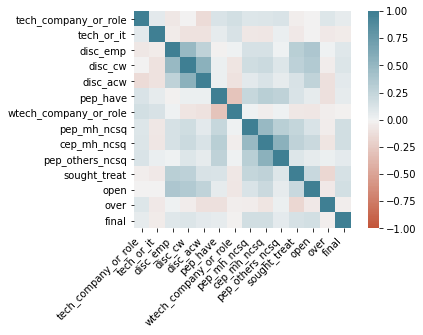

In [ ]:
orr = df3.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# Using only the columns that are related to final column
df4=df3[['tech_company_or_role','disc_emp','disc_cw','disc_acw','pep_have','open','sought_treat','pep_others_ncsq','cep_mh_ncsq','pep_mh_ncsq','final']]


In [ ]:
df4.head()

,tech_company_or_role,disc_emp,disc_cw,disc_acw,pep_have,open,sought_treat,pep_others_ncsq,cep_mh_ncsq,pep_mh_ncsq,final
0,True,False,True,True,True,False,False,True,False,False,False
1,True,False,True,True,True,False,False,True,True,False,False
2,True,False,True,True,True,False,False,False,False,False,True
3,True,False,False,True,True,False,False,True,False,False,False
4,True,False,False,False,True,False,False,False,False,False,False


## Implementing Various claasifiers like RandomForestClaasifier, Bagging classifier and Voting Classifier and Using the Classifier that gives the maximum accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, 
                                                    test_size = 0.20,
                                                   random_state=42)
print(X_train.count())
print(y_train.count())
print(X_test.count())
print(y_test.count())

tech_company_or_role    281
disc_emp                281
disc_cw                 281
disc_acw                281
pep_have                281
open                    281
sought_treat            281
pep_others_ncsq         281
cep_mh_ncsq             281
pep_mh_ncsq             281
dtype: int64
281
tech_company_or_role    71
disc_emp                71
disc_cw                 71
disc_acw                71
pep_have                71
open                    71
sought_treat            71
pep_others_ncsq         71
cep_mh_ncsq             71
pep_mh_ncsq             71
dtype: int64
71


In [ ]:
clf2 = RandomForestClassifier(n_estimators=200, random_state=0)  
clf2.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=clf2.predict(X)

In [ ]:
X=df3.drop(columns=['final','num_employees'])
y=df3['final']

In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20,
                                                   random_state=42)

In [ ]:
clf_w= RandomForestClassifier(n_estimators=135, random_state=0)  
clf_w.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=135,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=clf_w.predict(X_test)

In [ ]:
clf_w.score(X_test,y_test)

0.5633802816901409

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

In [ ]:
eclf1 = eclf1.fit(X_train, y_train)

In [ ]:
y_pred=eclf1.predict(X_test)

In [ ]:
eclf1.score(X_test,y_test)

0.5211267605633803

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
k=BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
clf = k.fit(X_train, y_train)
y_pred=clf.predict(X_test)
clf.score(X_test,y_test)

0.6197183098591549